# Python for Machine Learning

1. Content
2. Review of ML
    - Supervised learning
    - Unsuperivised learning
3. Python Environment for ML
    - Libraries and modules for ML
4. ML in scikit-learn
    - Introduction to sklearn
    - Basic ML: linear regression, logistic regression, k-means
    - Moderate ML: classification trees, neural networks
5. Learning more 

# Review of ML

*What is ML?*

- Making sense of data
- Performing induction on data

In ML we are given **data**, and we want to learn **something** from the data.

ML answers the question **how** to learn; the question **what** to learn is up to YOU.

## Types of ML

*What types of ML are there?*

We can formalize different learning tasks

- Supervised learning
- Unsupervised learning
- Reinforcement learning
- Semi-supervised learning
- Transfer learning
- ...

Problems vary according to the the type of **data** you are given and the type of **knowledge** you want to get.

## Supervised learning

## Unsupervised learning

## Problem of generalization

## Fitting and testing

# 2. Python Environment for ML

Python provides a flexible and customizable environment to set up your machine learning setup.

![](python_env.png)

Use **environment manager** systems to control you environment (e.g.: **conda**)
- Install packages for you
- Verify consistency between packages
- Allows rollback

## What we consider

<img src="python_env.png">

- **numpy**: library supporting matrices and tensors
- **matplotlib**: library for plotting
- **scikit-learn**: library for machine learning

## What we do not consider

![](python_env.png)

- **scipy**: library providing scientific modules for dealing with signal processing, statistics, engineering...
- **joblib**: library for pipelining
- **pandas**: library for managing and querying data frames
- **networkx**: library for working with graphs
- **tensorflow** and **pytorch**: library for running neural networks
- **jupyter**: interactive interface to the python environment (what we are running now)

# ML in scikit-learn

*scikit-learn* is a popular python package providing a wide selection of algorithms.

We are going to see how to carry out machine learning tasks relying on *scikit-learn*.

*scikit-learn* contains many more functionalities than the few ones we are going to consider here. Refer to the [documentation](https://scikit-learn.org/stable/) to learn more!

## ML pipeline

A simplified ML pipeline contains at least the following steps:

![](ML_pipeline.png)

- *Data loading*: we start by gathering the data we want to analyze
- *Data pre-processing*: we fix and/or improve the data quality
- *Model fittin*: we apply a machine learning model
- *Evaluation*: we measure how well the model performs

If we are happy with the evaluation we can then deploy our model; otherwise, we go back.

## Data as matrices/tensors

Data is essentially represented as a *table*

  .   | Age | Pressure | Heartrate | ... | BMI 
------|------------|------------|------------|-----|------------
Hippocrates | 36 | 120 | 69 | ... | 20
Imhotep | 72 | 112 | 81 | ... | 21
Charaka | 51 | 85 | 87 | ... | 20
... | ... | .... | .... | ... | ...
Ibn-Sina | 18 | 131 | 62 | ... | 22


- each row is a **sample**, *observation*, *case*, or *individual*.
- each column is a **feature**, or *attribute*.

This interpretation of rows and columns is pretty standard, but remember to always check!

We use **numpy** a data table in a **matrix**, or *2D array* or *2D tensor*.

In [1]:
import numpy as np

D = np.array([[36,120,69,20],
             [72,112,81,21],
             [51,85,87,20],
             [18,131,62,22]])

print(D)

[[ 36 120  69  20]
 [ 72 112  81  21]
 [ 51  85  87  20]
 [ 18 131  62  22]]


Notice we discarded the name of columns and row.

Working with all the numbers in a single matrix allows to make computation very efficient!

## Data loading/generation

ML starts with **data**. You can:
- Collect your own data (complex, costly)
- Load available data (easy with public dataset)
- Generate your own data (useful for testing ideas)
- Aggregate sources (complex)

A **data set** is a homogeneous collection of data.


*sklearn* comes with datasets included!

Datasets are made available in *sklearn.datasets* (see [doc](https://scikit-learn.org/stable/datasets/index.html))


In [2]:
import sklearn.datasets as datasets


### Diabetes

We load the *diabetes* datataset and separate the data matrix ($X$), the labels ($y$), and the feature names ($fnames$).

In [3]:
dataset = datasets.load_diabetes()

X_diabetes = dataset['data']
y_diabetes = dataset['target']
fnames_diabetes = dataset['feature_names']

Let's have a look at our data.

In [4]:
X_diabetes.shape

(442, 10)

In [5]:
fnames_diabetes

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
y_diabetes[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

*diabetes* is a regression dataset: labels are numbers.

As discussed above, the underlying structure of the data matrix $X$ is a table/matrix/tensor.

In [7]:
X_diabetes[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

### Exercise

1. What are the features of individual 10?
2. What is the age of individual 23? What do you think is the meaning of this value?
3. What is the highest value of diabetes?
4. Can you compute the average age of all the individuals? What do you think is the meaning of this result?
5. What are the values that the variable 'sex' may assume? How do you interpret them?

Let's have a look at a plot of diabetes as a function of bmi.

Text(0, 0.5, 'diabetes')

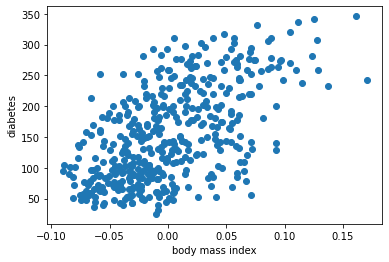

In [8]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_diabetes[:,2],y_diabetes)
plt.xlabel('body mass index')
plt.ylabel('diabetes')

### Exercise

1. What are the observations you can already make from the plot we made?
2. Plot now diabetes as a function of age. What do you observe? What insights do you get from this?

### Iris

Let's have a look at the *iris* datataset as well, and separate the data matrix ($X$), the labels ($y$), and the feature names ($fnames$).

In [9]:
dataset = datasets.load_iris()

X_iris = dataset['data']
y_iris = dataset['target']
fnames_iris = dataset['feature_names']

In [10]:
X_iris.shape

(150, 4)

In [11]:
fnames_iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
y_iris[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

*iris* is a regression dataset: labels are categories.

As discussed above, the underlying structure of the data matrix $X$ is a table/matrix/tensor.

In [13]:
X_iris[0:5,0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Exercise

1. What are the features of sample 21?
2. How many labels do we have?
3. What is the maximum and minimum value of petal length?
4. Is there a different in how the values of petal length in *iris* are recorded compared to the values of age in *diabetes*?

Let's have a look at a how the labels depend on petal length and petal width.

Text(0, 0.5, 'petal width')

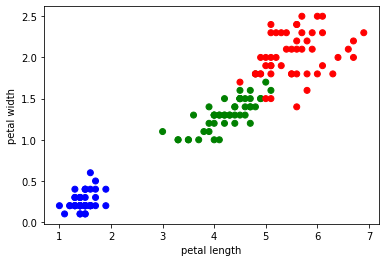

In [14]:
colors = ['blue', 'green', 'red']

plt.scatter(X_iris[:,2],X_iris[:,3],c=y_iris, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('petal length')
plt.ylabel('petal width')

### Exercise

1. What are the observations you can already make from the plot we made?
2. Plot now the same graph using different feature, for example, sepal length and petal width. What insights do you get from this?

## Data partitioning

As explained, it is important to divide the data between *training* and *test* data.

Sometimes, you are given data already partitioned. Sometimes, you have to partition it yourself.

We now divide both *diabetes* and *iris* data in two sets. 

Before dividing the data, we randomly shuffle it. Notice we apply the same shuffling to data and labels to keep them aligned.

In [15]:
diabetes_shuffle = np.random.permutation(X_diabetes.shape[0])
iris_shuffle = np.random.permutation(X_iris.shape[0])

In [16]:
X_diabetes = X_diabetes[diabetes_shuffle]
y_diabetes = y_diabetes[diabetes_shuffle]

X_iris = X_iris[iris_shuffle]
y_iris = y_iris[iris_shuffle]

We keep roughly 80% of the samples for training and 20% for testing.

In [17]:
Xtr_diabetes = X_diabetes[0:350,:]
ytr_diabetes = y_diabetes[0:350]
Xte_diabetes = X_diabetes[350:,:]
yte_diabetes = y_diabetes[350:]

Xtr_iris = X_iris[0:120,:]
ytr_iris = y_iris[0:120]
Xte_iris = X_iris[120:,:]
yte_iris = y_iris[120:]

We have now divided the data. Look how the dimensions match.

In [18]:
print(X_diabetes.shape)
print(Xtr_diabetes.shape)
print(Xte_diabetes.shape)

(442, 10)
(350, 10)
(92, 10)


In [19]:
print(X_iris.shape)
print(Xtr_iris.shape)
print(Xte_iris.shape)

(150, 4)
(120, 4)
(30, 4)


From this moment on, it is very important that **knowledge in the test dataset doesn NOT flow into your modeling process**!

More sophisticated approaches may require to partition the dataset in more than two parts.

## Data pre-processing

Before feeding your data you may want to **pre-process** it:
- Delete otuliers
- Fix missing values
- Makes unit homogeneous
- Sub-select some features of interest (*remove redundant features*)
- Combine together features
- Perform smart transformations (*whitening*, *Fourier*)

Pre-processing are transformation you apply to the data because you know they are useful.

Some forms of preprocessing have specifing names such as **feature selection**, **feature extraction**, **imputation of missing values**...

*sklearn* comes with preprocessing functionalities included!

Basic preprocessing is made available in *sklearn.preprocessing* (see [doc](https://scikit-learn.org/stable/modules/preprocessing.html)).

Other preprocessing module are *sklearn.feature_selection* (see [doc](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)), *sklearn.feature_extraction* (see [doc](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction)), or *sklearn.feature_impute* (see [doc](https://scikit-learn.org/stable/modules/impute.html)).

In [20]:
import sklearn.preprocessing as preproc

### Feature removal/addition

The simplest preprocessing you can imagine is removing or adding features.

Let us create a copy of the *diabetes* data were we exclude the age feature.

In [21]:
X_diabetes2 = X_diabetes[:,1:]
print(X_diabetes2[0:10,:])

[[-0.04464164  0.04552903  0.09072977 -0.01808039 -0.03544706  0.07072993
  -0.03949338 -0.03452372 -0.00936191]
 [-0.04464164 -0.02668438  0.04941532  0.05897297 -0.01603186 -0.04708248
   0.07120998  0.13359898  0.01963284]
 [-0.04464164 -0.02129532 -0.07452802 -0.04009564 -0.0376391  -0.00658447
  -0.03949338 -0.00060925 -0.05492509]
 [ 0.05068012 -0.00836158 -0.00222774 -0.03321588 -0.06363042 -0.03603757
  -0.00259226  0.08058546  0.00720652]
 [-0.04464164 -0.00405033 -0.00567061 -0.00844872 -0.02386057  0.05232174
  -0.03949338 -0.00894402 -0.01350402]
 [ 0.05068012 -0.03315126 -0.01829447  0.03145391  0.04284006 -0.01394774
   0.01991742  0.01022564  0.02791705]
 [ 0.05068012  0.01750591  0.03220097  0.12777061  0.12739014 -0.02131102
   0.07120998  0.06257518  0.01549073]
 [-0.04464164  0.00564998  0.01154374  0.07823631  0.07791268 -0.04340085
   0.1081111   0.06604821  0.01963284]
 [-0.04464164 -0.02884001 -0.00911348 -0.00432087 -0.00976889  0.04495846
  -0.03949338 -0.03075

### Exercise

1. Can you see why removing a feature may make sense?
2. When does it not make sense to remove a feature?
3. Do you think that in the case of the *diabetes* dataset does it make sense to remove age?
4. Create a new dataset *X_{diabetes3}* made up only by the bmi and bp variable.


Alternatively, we may introduce new features combining existing features.

We will add to the *diabetes* data a new variable given by the product of s1 and s4.


In [22]:
X_diabetes4 = X_diabetes.copy()
X_diabetes4 = np.hstack((X_diabetes4, np.expand_dims(X_diabetes4[:,4]*X_diabetes4[:,7],axis=1)))
X_diabetes4.shape

(442, 11)

In [23]:
print(X_diabetes2[0:10,:])

[[-0.04464164  0.04552903  0.09072977 -0.01808039 -0.03544706  0.07072993
  -0.03949338 -0.03452372 -0.00936191]
 [-0.04464164 -0.02668438  0.04941532  0.05897297 -0.01603186 -0.04708248
   0.07120998  0.13359898  0.01963284]
 [-0.04464164 -0.02129532 -0.07452802 -0.04009564 -0.0376391  -0.00658447
  -0.03949338 -0.00060925 -0.05492509]
 [ 0.05068012 -0.00836158 -0.00222774 -0.03321588 -0.06363042 -0.03603757
  -0.00259226  0.08058546  0.00720652]
 [-0.04464164 -0.00405033 -0.00567061 -0.00844872 -0.02386057  0.05232174
  -0.03949338 -0.00894402 -0.01350402]
 [ 0.05068012 -0.03315126 -0.01829447  0.03145391  0.04284006 -0.01394774
   0.01991742  0.01022564  0.02791705]
 [ 0.05068012  0.01750591  0.03220097  0.12777061  0.12739014 -0.02131102
   0.07120998  0.06257518  0.01549073]
 [-0.04464164  0.00564998  0.01154374  0.07823631  0.07791268 -0.04340085
   0.1081111   0.06604821  0.01963284]
 [-0.04464164 -0.02884001 -0.00911348 -0.00432087 -0.00976889  0.04495846
  -0.03949338 -0.03075

### Exercise

1. Can you see why combining features may make sense?
2. Create a new dataset *X_{diabetes4}* adding two new features: (i) s1+s2+s3+s4+s5, (ii) bm / bp.
3. Any formal concern with generating the new feature (ii)?

In general, it will be probably rare for you to add or delete features by considering their meaning.

Normally features are meaningful, and, in general, you don't want to discard information.

More refined methods may be used to manipulate/change/redesign features.

Yet, you should **always think if what you are doing makes sense**!

### Feature Scaling

*Scaling* allows to rescale features in a given interval.

Let us consider the first ten samples on the *iris* data and rescale them.

In [24]:
X = X_iris[0:10,:].copy()
print(X)

[[6.4 2.9 4.3 1.3]
 [6.9 3.2 5.7 2.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.8 5.1 2.4]
 [5.4 3.  4.5 1.5]
 [6.2 2.8 4.8 1.8]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.5 2.3 1.3 0.3]
 [6.7 3.3 5.7 2.5]]


In [25]:
X_scaled = preproc.scale(X)
print(X_scaled)

[[ 0.59965319  0.2054662  -0.1691734  -0.62498893]
 [ 1.28107728  0.97596444  0.95864924  0.86307995]
 [ 0.59965319  0.97596444  0.6364142   0.86307995]
 [-0.21805571 -0.05136655  0.47529668  1.01188684]
 [-0.76319497  0.46229895 -0.00805588 -0.32737515]
 [ 0.32708356 -0.05136655  0.2336204   0.11904551]
 [-1.30833424 -2.10602854 -0.81364348 -1.07140959]
 [ 0.46336838 -0.3081993   0.31417916  0.11904551]
 [-1.98975832 -1.33553029 -2.58593619 -2.1130578 ]
 [ 1.00850764  1.23279719  0.95864924  1.16069372]]


### Exercise

1. Check the mean of each column in $X$ and $X_{scaled}$. What do you observe?
2. Can you guess why such a transformation would make sense?

## Model fitting

Next, we actually apply a **model** to the data.

Depending on what you are doing there are many available models:
- Supervised learning
    - linear regression
    - quadratic regression
    - logistic regression
    - k-nearest neighbours
    - classification trees
    - neural networks
    - ...
- Unsupervised learning
    - principal component analysis
    - k-means
    - autoencoders
    - Gaussian mixture models
    - ...
    
You find all these models in *sklearn*!

*sklearn* provides a simple and neat interface to all the models:

1. Choose your model
2. Instantiate the model
3. Fit the model to your training data using the *fit()* function
4. Apply the model to your test data using the *predict()* function (in supervised learning) or *transform()* function (in unsupervised learning).

**The most important step here is step 1!**

### Linear Regression

In linear regression, we try to predict a continuous value from (a set of) other values by combining them linearly.

Let us consider the *diabetes* data set. For illustration, we will try to *regress* the diabetes index on the bmi feature. (We now use only one feature as an example)

We first subselect our data.

In [26]:
Xtr_linregr = np.expand_dims(Xtr_diabetes[:,2],axis=1)
ytr_linregr = ytr_diabetes

Xte_linregr = np.expand_dims(Xte_diabetes[:,2],axis=1)
yte_linregr = yte_diabetes

We apply the model.

In [27]:
import sklearn.linear_model as lm

model = lm.LinearRegression()

In [28]:
model.fit(Xtr_linregr,ytr_linregr)

LinearRegression()

In [29]:
yhat1 = model.predict(Xte_linregr)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [30]:
print(yte_linregr[0:10])
print(yhat1[0:10])

[131. 144. 258. 129.  79.  85.  64.  83. 317. 144.]
[157.63986581 130.1781414  251.79434948 154.69753819  90.94710654
  77.21624434  97.81253764 102.716417   194.90934893 196.87090067]


Let see exactly what our model is.

Text(0, 0.5, 'diabetes')

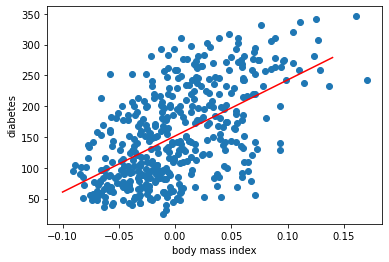

In [31]:
plt.scatter(X_diabetes[:,2],y_diabetes)

xs = np.arange(-.10,.15,.01)
plt.plot(xs, model.predict(np.expand_dims(xs,axis=1)),c='red')

plt.xlabel('body mass index')
plt.ylabel('diabetes')

We don't have to use only one feature in the linear regression model. We can use all of them.

In [32]:
model = lm.LinearRegression()
model.fit(Xtr_diabetes,ytr_diabetes)
yhat2 = model.predict(Xte_diabetes)

Let's check the predictions againt the ground truth:

In [33]:
print(yte_diabetes[0:10])
print(yhat1[0:10])
print(yhat2[0:10])

[131. 144. 258. 129.  79.  85.  64.  83. 317. 144.]
[157.63986581 130.1781414  251.79434948 154.69753819  90.94710654
  77.21624434  97.81253764 102.716417   194.90934893 196.87090067]
[167.00774434 119.78406983 290.39683481 196.15564856 117.52023817
  55.70935746 117.03564108  71.72512557 222.38830538 152.82302978]


We will see how to evaluate properly later, but you already see that considering more features improved the results.

Unfortunately it is now unfeasible to plot the data considering all the features!

### Exercise

1. What do you think are the limitation of this model?
2. What do you think are the strength of this model?
3. Try to regress the diabetes index on age. What do you observe?

### Logistic Regression 
In logistic regression, we try to predict a category from (a set of) other values, again by combining them linearly.

Let us consider the *iris* data set. For illustration, we will try to classify data from two classes using petal width and petal length.

We first subselect the data we will work with.

In [34]:
selection_tr = ytr_iris<2
selection_te = yte_iris<2

Xtr_logregr = Xtr_iris[selection_tr,0:2]
ytr_logregr = ytr_iris[selection_tr]
Xte_logregr = Xte_iris[selection_te,0:2]
yte_logregr = yte_iris[selection_te]

Notice that our data has decreased

In [35]:
print(Xtr_logregr.shape)
print(Xte_logregr.shape)

(81, 2)
(19, 2)


We apply the model.

In [36]:
model = lm.LogisticRegression()

In [37]:
model.fit(Xtr_logregr,ytr_logregr)

LogisticRegression()

In [38]:
yhat3 = model.predict(Xte_logregr)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [39]:
print(yte_logregr[0:10])
print(yhat3[0:10])

[1 1 1 0 1 0 1 0 1 0]
[1 1 1 0 1 0 1 0 1 0]


Let see exactly what our model is.

Text(0, 0.5, 'sepal width (cm)')

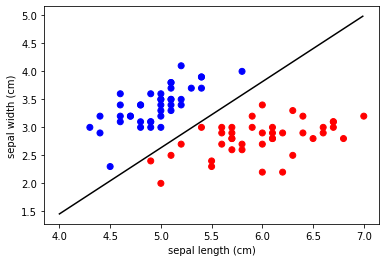

In [45]:
plt.scatter(Xtr_logregr[:,0],Xtr_logregr[:,1],c=ytr_logregr, cmap=matplotlib.colors.ListedColormap(colors))

xs = np.arange(4,7,.01)
line_bias = model.intercept_
line_w = model.coef_.T
ys=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in xs]
plt.plot(xs, ys, c='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

### Exercise

1. What is the difference between the line we plotted for linear regression and the line we plotted for logistic regression?
2. As in the case of linear regression, logistic regression is not limited to two features. Run the logistic regression algorithm using all four features.
3. Logistic regression can deal with more than two classes. Run the logistic regression algorithm using all four features, and considering three classes.

### k-means

### Classification trees

### Neural Networks 

## Evaluation

# Learning More

This class has illustrated how machine learning can be carried out using python.

python provides a **powerful** and **fun** environment to do machine learning!


Some **takeaway points** when you do machine learning in python:

- Think about what you are doing
- Think about what you want to do
- Think about what model you can use
- Read the documentation


There is **much much more** to machine learning and python!!

If you want to learn more about python, check:
- [https://www.python.org/](https://www.python.org/)

If you want to learn more about scikit-learn, check:
- [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html)

If you want to learn more about machine learning in python, consider:
- Sarah Guido, *Introduction to Machine Learning with Python*
- [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
- [Dive into Machine Learning](https://github.com/hangtwenty/dive-into-machine-learning)
- Sebastian Raschka, *Python Machine Learning*

If you want to learn more about machine learning, consider:
- Cristoper Bishop, *Pattern Recognition and Machine Learning*
- Peter E. Hart, Richard O. Duda, David G. Stork, *Pattern Classification*